In [1]:
#Import libraries
import csv
import pandas as pd
import seaborn as sb
import numpy as np
#Read Salaries.csv as a dataframe called sal
sal = pd.read_csv('https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv')

*Check the head of the DataFrame.

In [69]:
#đọc 5 dòng dữ liệu đầu
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,title_len
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN,46
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,31
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN,31
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN,36
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN,44


*Use the .info() method to find out how many entries there are.

In [68]:
sal.info()
# có tất cả 148654 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 14 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
title_len           148654 non-null int64
dtypes: float64(8), int64(3), object(3)
memory usage: 15.9+ MB


*What is the average BasePay ?

In [67]:
#mean() của dataframe để tìm giá trị trung bình của BasePay
sal['BasePay'].mean()

66325.44884050643

*What is the lowest and highest amount of BasePay?

In [66]:
# sử dụng min()và max() để tìm ra giá trị nhỏ nhất và lớn nhất của BasePay
[sal['BasePay'].min(),sal['BasePay'].max()]

[-166.01, 319275.01]

*How about OvertimePay in the dataset? What is the average, lowest, highest amount?

In [65]:
# sử dụng method mean(), min(), max() để tìm ra các giá trị trung bình, min, max của OvertimePay trong tập dữ liệu
[sal['OvertimePay'].mean(), sal['OvertimePay'].min(), sal['OvertimePay'].max()]

[5066.059886444622, -0.01, 245131.88]

*What is the job title of JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).

In [70]:
# tìm trong sal lấy thuộc tính 'JobTitle' nơi có tên 'EmployeeName'='JOSEPH DRISCOLL' 
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

*Now try to select Employees who have name "GARY JIMENEZ"

In [72]:
#Tìm trong sal lấy thông tin cả column nơi có tên 'EmployeeName' = 'GARY JIMENEZ' 
sal[sal['EmployeeName']=='GARY JIMENEZ']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status,title_len
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN,31


*How much does JOSEPH DRISCOLL make (including benefits)?

In [73]:
# tìm trong sal nơi có 'EmployeeName' = 'JOSEPH DRISCOLL' thì lấy giá trị 'TotalPayBenefits'
sal[sal['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

*What is the name of highest paid person (including benefits)?

In [74]:
# sử dụng method idxmax() để lấy vị trí của dòng có giá trị TotalPayBenefits lớn
# nhất, truyền vào method loc() để lấy dòng đó
# và sau đó lấy giá trị 'EmployeeName' của dòng đó
sal.loc[sal['TotalPayBenefits'].idxmax()]['EmployeeName']

'NATHANIEL FORD'

*What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?

In [76]:
# sử dụng method idxmin() để lấy vị trí của dòng có giá trị TotalPayBenefits nhỏ
# nhất, truyền vào method loc() để lấy dòng đó
# và sau đó lấy giá trị 'EmployeeName' của dòng đó
sal.loc[sal['TotalPayBenefits'].idxmin()]['EmployeeName']

'Joe Lopez'

In [77]:
# how much dose he(she) is paid ?
# sử dụng method idxmin() để lấy vị trí của dòng có giá trị TotalPayBenefits nhỏ
# nhất, truyền vào method loc() để lấy dòng đó
# và sau đó lấy giá trị 'TotalPayBenefits' của dòng đó
sal.loc[sal['TotalPayBenefits'].idxmin()]['TotalPayBenefits']
# số tiền mà người này được trả là số âm

-618.13

*What was the average (mean) BasePay of all employees per year? (2011-2014) ? Keyword: groupby

In [116]:
# Groupby & mean
# và chọn cột BasePay
sal.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

*How many unique job titles are there?
Keyword: unique, nunique

In [79]:
# sử dụng method nunique() để đếm số lượng JobTitle khác nhau
sal['JobTitle'].nunique()

2159

*What are the top 5 most common jobs?

In [118]:
# sử dụng method value_counts để đếm số lượng mỗi giá trị của JobTitle và xếp theo thứ tự giảm dần
sal['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

*How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)

In [81]:
# sử dụng method value_counts() để sắp xếp các dòng dữ liệu có year = 2013 
# và đếm các dòng dữ liệu (theo JobTitle) có số lượng là một
sum(sal[sal['Year']==2013]['JobTitle'].value_counts()==1)

202

*How many people have the word Chief in their job title?

In [82]:
# hàm kiểm tra có từ chief trong tên chức vụ. nếu có return true
# nếu không có thì return false
def Check_chief(title):
    if 'chief' in title.lower().split():
        return True
    else:
        return False
# đếm các tên có chứa từ chief
sum(sal['JobTitle'].apply(lambda x:Check_chief(x)))


477

*Implement seaborn's countplot with x='Year'

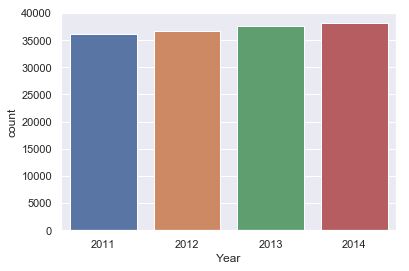

In [119]:
# sử dụng countplot của seaborn để vẽ đồ thị countplot theo thuộc tính year
sb.countplot(x='Year', data = sal)

*Implement seaborn's distplot for BasePay of Year 2011

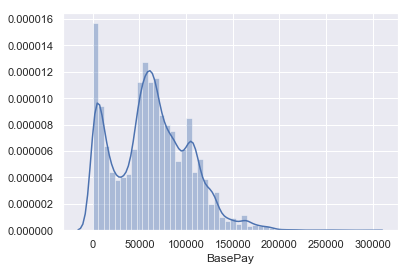

In [100]:
# tạo biến x chứa các giá trị 'BasePay' trong năm 2011 và sử dụng distplot để vẽ đồ thị distplot
x = sal[sal['Year']==2011]['BasePay']
sb.distplot(x)

*How about other Year?

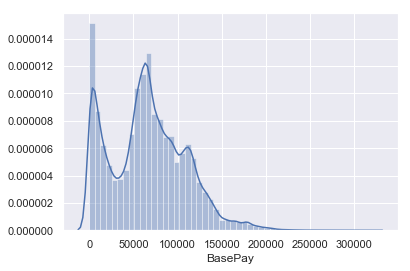

In [121]:
# đặt x = cột giá trị của BasePay
# sau đó thay những giá trị NaN bằng 0
x = sal['BasePay']
x = x.replace(np.nan,0)
sb.distplot(x)

*Visualize top 5 Jobs with BasePay, Benefits and OvertimePay

Fun Fact: Is there a correlation between length of the Job Title string and Salary?

In [127]:
# tạo thêm cột dữ liệu 'title_len' chứa chiều dài của title 
sal['title_len'] = sal['JobTitle'].apply(len)
# sử dụng method corr() để tạo bảng liên hệ giữa 2 thuộc tính title_len và TotalPayBenefits
sal[['TotalPayBenefits', 'title_len']].corr()

,TotalPayBenefits,title_len
TotalPayBenefits,1.000000,-0.036878
title_len,-0.036878,1.000000
